In [108]:
# file = "/Users/timliu/Documents/on the desktop/MSc BA/論文/ARP/Life groups & Retail life/AGN NA/20150513_Aegon_NV-_Earnings_Call_2015-5-13_FS000000002567987335.pdf"

# with open(file, "rb") as f:
#     pdf = pdftotext.PDF(f)
# # Save all text to a txt file.
# with open(file.replace(".pdf", ".txt"), "w") as f:
#     f.write("\n\n".join(pdf))
# # open the text file
# with open(file.replace(".pdf", ".txt")) as f:
#     contents = f.readlines()
#     df_clean = cleaning_text(contents)    ##### here we use the function from data_cleaning.py
    
#     index_presentation = df_clean[df_clean[0] == 'Presentation'].index
#     if len(index_presentation) == 2:
#         df_clean.loc[index_presentation[0], 0] = 'heading' # replace the first index_presentation in df_clean with "head" # interacting with the participant_function.py

#     # extract the participants
#     tmp_df_text,tmp_company_paticipants,tmp_other_paticipants = participants_list(df_clean) ##### here we use the function from participant_function.py

# df = df_clean.copy()

# # drop the Questions And Answers and the following rows
# QA_index = df.index[df.iloc[:,0] == 'Questions And Answers'].tolist()
# # get the index of the last row of df
# end_index = [len(df)]
# if QA_index == []:
#     QA_index = df.index[df.iloc[:,0] == 'Q&A'].tolist()
#     end_index = [len(df)]
#     if QA_index == []:
#         # get the index of the last row of df
#         end_index = []

# # QA_index = []
# # end_index = []
# if QA_index != []:
#     test = df.drop(df.index[QA_index[0]:end_index[0]])
# test

In [84]:
# self-define function
from data_cleaning import cleaning_text, sentence_df
from participant_function import participants_list, clean_participants_list
from stock_price_info import stock_price_change

# read and saving path
path = "/Users/timliu/Documents/GitHub/BoE_ARP_model/meeting_transcript"
save_path = "/Users/timliu/Documents/GitHub/BoE_ARP_model/output"

# path = "/Users/hienanh/Documents/GitHub/final_01/Transcript_test"
# save_path = "/Users/hienanh/Documents/GitHub/final_01/Output"

# other packages
import pdftotext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import string
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
# from sklearn.linear_model import LogisticRegression

import nltk 
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          # module for stop words that come with NLTK
nltk.download('stopwords')
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/timliu/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/timliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
# all files path
company_paths = []
sectors = os.listdir(path) 
if '.DS_Store' in sectors:
    sectors.remove('.DS_Store')

for sector in sectors:
    # path to each sector files
    sector_path = path+"/"+sector
    
    # path to each company files
    companies = os.listdir(sector_path)
    if '.DS_Store' in companies:
        companies.remove('.DS_Store')
    
    for company in companies:
        tmp = sector_path+"/"+company
        company_paths.append(tmp)

In [116]:
# # checking with DF (not necessary)
# company_paticipants_df = pd.DataFrame()
# other_paticipants_df = pd.DataFrame()

df_clean_na = pd.DataFrame(np.zeros((2500,1)), columns=['index']) # create a dataframe with 2500 rows
# all_participants = []      
company_paticipants_list = [] 
other_paticipants_list = []

for single_path in company_paths:
    files = os.listdir(single_path)
    for file in files:
        # print(file)
        if file.endswith(".pdf"):
            # print(file)
            # Load PDF
            with open(single_path+"/"+file, "rb") as f:
                pdf = pdftotext.PDF(f)
            # Save all text to a txt file.
            with open(save_path+"/"+file.replace(".pdf", ".txt"), "w") as f:
                f.write("\n\n".join(pdf))
            # open the text file
            with open(save_path+"/"+file.replace(".pdf", ".txt")) as f:
                contents = f.readlines()
                df_clean = cleaning_text(contents)    ##### here we use the function from data_cleaning.py
                
                # drop the Questions And Answers and the following rows
                QA_index = df_clean.index[df_clean.iloc[:,0] == 'Questions And Answers'].tolist()
                # get the index of the last row of df
                end_index = [len(df_clean)]
                if QA_index == []:
                    QA_index = df_clean.index[df_clean.iloc[:,0] == 'Q&A'].tolist()
                    end_index = [len(df_clean)]
                    if QA_index == []:
                        # get the index of the last row of df
                        end_index = []
                
                if QA_index != []:
                    df_clean = df_clean.drop(df_clean.index[QA_index[0]:end_index[0]])
                df_clean = df_clean.reset_index(drop=True)                       

                index_presentation = df_clean[df_clean[0] == 'Presentation'].index
                if len(index_presentation) == 2:
                    df_clean.loc[index_presentation[0], 0] = 'heading' # replace the first index_presentation in df_clean with "head" # interacting with the participant_function.py

                # extract the participants
                tmp_df_text,tmp_company_paticipants,tmp_other_paticipants = participants_list(df_clean) ##### here we use the function from participant_function.py
                company_paticipants_list.append(tmp_company_paticipants)
                other_paticipants_list.append(tmp_other_paticipants)
                

                # # checking with DF (not necessary)
                # company_paticipants = pd.DataFrame(company_paticipants)
                # if company_paticipants.empty:
                #     company_paticipants = pd.DataFrame(np.zeros((1,1)), columns=['index'])
                # company_paticipants_df[f"{files[files.index(file)]}"] = company_paticipants
                # other_paticipants = pd.DataFrame(other_paticipants)
                # if other_paticipants.empty:
                #     other_paticipants = pd.DataFrame(np.zeros((1,1)), columns=['index'])
                # other_paticipants_df[f"{files[files.index(file)]}"] = other_paticipants
                
                df = pd.DataFrame()
                df[f"{files[files.index(file)]}"] = tmp_df_text
                # remove the row using re, if the row ends with Presentation  Investor Day	
                df_clean_na[f"{files[files.index(file)]}"] = df[f"{files[files.index(file)]}"].dropna(inplace=False).reset_index(drop=True)

# drop the first column of the df
df_clean_na = df_clean_na.iloc[:,1:]
df_clean_na.head(5)
# error_file: '/Users/timliu/Documents/GitHub/BoE_ARP_model/meeting_transcript/Other Insurers/SANPO FH/20180808_Sampo_Oyj-_Earnings_Call_2018-8-8_DN000000002453826008.pdf'

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_72835/1455185256.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean_na[f"{files[files.index(file)]}"] = df[f"{files[files.index(file)]}"].dropna(inplace=False).reset_index(drop=True)


,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,20200811_Quilter_PLC-_Earnings_Call_2020-8-11_DN000000002883967732.pdf,20190805_Quilter_PLC-_Earnings_Call_2019-8-5_RT000000002897819838.pdf,20180808_Quilter_PLC-_Earnings_Call_2018-8-8_FS000000002459369907.pdf,20210401_Quilter_PLC-_M-A_Call_2021-4-1_RT000000002954187686.pdf,20171219_Quilter_PLC-_M-A_Call_2017-12-19_SD000000002919419964.pdf,20210310_Quilter_PLC-_Earnings_Call_2021-3-10_RT000000002952420637.pdf,20140904_Sanlam_Ltd-_Earnings_Call_2014-9-4_DN000000002170588806.pdf,...,20140424_Everest_Re_Group_Ltd-_Earnings_Call_2014-4-24_SD000000002701577115.pdf,20211028_Everest_Re_Group_Ltd-_Earnings_Call_2021-10-28_DN000000002966766153.pdf,20170207_Everest_Re_Group_Ltd-_Earnings_Call_2017-2-7_FS000000002327179820.pdf,20160204_Everest_Re_Group_Ltd-_Earnings_Call_2016-2-4_FS000000002251252548.pdf,20140724_Everest_Re_Group_Ltd-_Earnings_Call_2014-7-24_FS000000002439093631.pdf,20171031_Everest_Re_Group_Ltd-_Earnings_Call_2017-10-31_DN000000002379633496.pdf,20150428_Everest_Re_Group_Ltd-_Earnings_Call_2015-4-28_FS000000002207058997.pdf,20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf
0,Paul Feeney,Paul Feeney,Paul Feeney,Paul Feeney,Paul Feeney,Paul W. Feeney,Operator,Management Business of Old Mutual Wealth to TA,Operator,Johan van Zyl,...,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator,Operator
1,Good morning everybody. Welcome to our First F...,"Hello, and good morning, everyone. Thank you f...","Good morning, everybody. We'll follow the usua...","Good morning, everyone. And you'll understand ...","Good morning, everyone. Welcome to those of yo...",Welcome to our first results presentation as a...,(Call Starts Abruptly) This conference call is...,Associates,"Good morning, everyone. Given the circumstance...",Welcome to our Interim Results Presentation. A...,...,"Good morning, everyone and welcome to the Ever...",Welcome to the Everest Re Group Earnings Confe...,"Good day, everyone. Welcome to the Fourth Quar...","Good day, and welcome to the fourth quarter 20...","Good day, everyone and welcome to the Second Q...","Good day, everyone. Welcome to the Third Quart...","Good day, everyone, and welcome to the First Q...","Good day, everyone. Welcome to the Everest Re ...",Good day everyone and welcome to the Everest R...,"Good day, everyone. Welcome to the Second Quar..."
2,"know, we announced the CFO transition back in ...",for our Interim Results Presentation. Hopefull...,summary of 2019 and I'll spend a bit of time o...,today. But the broad format is similar to what...,and to those of you who have joined us on the ...,a bit early this morning. We know that one of ...,Paul Feeney. Please begin your meeting.,Operator,advance. I'll cover the business highlights an...,"Johannesburg. More interest, more money here i...",...,2014 earnings call. Today's conference is bein...,are in a listen-only mode. After the speaker p...,Group Ltd. Today's conference is being recorded.,Limited. Today's conference is being recorded.,Re Group. Today's conference is being recorded...,Group Limited. Today's conference is being rec...,Group Limited. Today's conference is being rec...,earnings release call. Today's conference is b...,earnings conference release call.,Group. Today's conference is being recorded. A...
3,Tim Tookey. So you'll hear from both of them t...,"to a virtual format, and I look forward to mee...",to better position us for the growth opportuni...,"the business highlights, Mark will then talk t...",follow our usual format this morning. I'll giv...,and we wanted to make sure that those of you w...,Paul Feene

In [117]:
# generating all the participants
company_paticipants_list = clean_participants_list(company_paticipants_list)
other_paticipants_list = clean_participants_list(other_paticipants_list)
all_participants_list_tmp = []
all_participants_list_tmp = company_paticipants_list + other_paticipants_list

# drop the duplicates
all_participants_list = []
for x in all_participants_list_tmp:
    if x not in all_participants_list:
        all_participants_list.append(x)


In [118]:
concat_df = pd.DataFrame()
participants_index =pd.DataFrame(np.zeros((2500,1)), columns=['index'])
for column in df_clean_na.columns:
    # identify all the rows in df with all_participants_list in it
    both_participants_row_index = df_clean_na[df_clean_na[column].isin(all_participants_list)].index.tolist()
    # apply the both_participants_row_index to the df_clean_na['participants']
    concat_df[column] = df_clean_na[column]
    ppt_list = df_clean_na[column].apply(lambda x: x if x in all_participants_list else 0)
    idx_list = [int(idx) if ppt_list[idx] != 0 else np.nan for idx in range(len(ppt_list)) ]
    # adding paricipants name
    concat_df[f"participants_{column}"] = [name if name != 0 else np.nan for name in ppt_list]
    # adding index columns
    concat_df[f"idx_{column}"] = idx_list
    # fill the NaN with the value of the previous row
    concat_df[f"participants_{column}"] = concat_df[f"participants_{column}"].fillna(method='ffill')
    concat_df[f"idx_{column}"] = concat_df[f"idx_{column}"].fillna(method='ffill')

concat_df

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_72835/3263364826.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[f"participants_{column}"] = [name if name != 0 else np.nan for name in ppt_list]
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_72835/3263364826.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_df[f"idx_{column}"] = idx_list
/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_72835/3263364826.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is us

,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,participants_20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,idx_20190312_Quilter_PLC-_Earnings_Call_2019-3-12_RT000000002903022737.pdf,20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,participants_20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,idx_20210811_Quilter_PLC-_Earnings_Call_2021-8-11_RT000000002962310912.pdf,20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,participants_20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,idx_20200311_Quilter_PLC-_Earnings_Call_2020-3-11_DN000000002822346246.pdf,20200811_Quilter_PLC-_Earnings_Call_2020-8-11_DN000000002883967732.pdf,...,idx_20150428_Everest_Re_Group_Ltd-_Earnings_Call_2015-4-28_FS000000002207058997.pdf,20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,participants_20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,idx_20120726_Everest_Re_Group_Ltd-_Earnings_Call_2012-7-26_SD000000002701554249.pdf,20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,participants_20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,idx_20121025_Everest_Re_Group_Ltd-_Earnings_Call_2012-10-25_SD000000002719409327.pdf,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf,participants_20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf,idx_20130724_Everest_Re_Group_Ltd-_Earnings_Call_2013-7-24_SD000000002719418375.pdf
0,Paul Feeney,Paul Feeney,0.0,Paul Feeney,Paul Feeney,0.0,Paul Feeney,Paul Feeney,0.0,Paul Feeney,...,0.0,Operator,Operator,0.0,Operator,Operator,0.0,Operator,Operator,0.0
1,Good morning everybody. Welcome to our First F...,Paul Feeney,0.0,"Hello, and good morning, everyone. Thank you f...",Paul Feeney,0.0,"Good morning, everybody. We'll follow the usua...",Paul Feeney,0.0,"Good morning, everyone. And you'll understand ...",...,0.0,"Good day, everyone. Welcome to the Everest Re ...",Operator,0.0,Good day everyone and welcome to the Everest R...,Operator,0.0,"Good day, everyone. Welcome to the Second Quar...",Operator,0.0
2,"know, we announced the CFO transition back in ...",Paul Feeney,0.0,for our Interim Results Presentation. Hopefull...,Paul Feeney,0.0,summary of 2019 and I'll spend a bit of time o...,Paul Feeney,0.0,today. But the broad format is similar to what...,...,0.0,earnings release call. Today's conference is b...,Operator,0.0,earnings conference release call.,Operator,0.0,Group. Today's conference is being recorded. A...,Operator,0.0
3,Tim Tookey. So you'll hear from both of them t...,Paul Feeney,0.0,"to a virtual format, and I look forward to mee...",Paul Feeney,0.0,to better position us for the growth opportuni...,Paul Feeney,0.0,"the business highlights, Mark will then talk t...",...,0.0,"remarks and introductions, I would like to tur...",Operator,0.0,[Operator Instructions],Operator,0.0,"introductions, I would like to turn the confer...",Operator,0.0
4,"financials, and Mark will go through our optim...",Paul Feeney,0.0,you and your families are keeping safe and well.,Paul Feeney,0.0,through the financials and our progress on opt...,Paul Feeney,0.0,take questions.,...,0.0,Beth Farrell,Beth Farrell,4.0,"As a reminder, today's presentation is being r...",Operator,0.0,"Investor Relations. Please go ahead, ma'am.",Operator,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,NaN,Paul Feeney,424.0,NaN,Paul Feeney,296.0,NaN,Paul Feeney,469.0,NaN,...,235.0,NaN,Beth Farrell,220.0,NaN,Beth Farrell,229.0,NaN,Beth Farrell,225.0
2496,NaN,Paul Feeney,424.0,NaN,Paul Feeney,296.0,NaN,Paul Feeney,469.0,NaN,...,235.0,NaN,Beth Farrell,220.0,NaN,Beth Farrell,229.0,NaN,Beth Farrell,225.0
2497,NaN,Paul Feeney,424.0,NaN,Paul Feeney,296.0,NaN,Paul Feeney,469.0,NaN,...,235.0,NaN,Beth Farrell,220.0,Na

In [119]:
# concat_df = pd.DataFrame()
# for column in df_clean_na.columns:
#     # identify all the rows in df with all_participants_list in it
#     both_participants_row_index = df_clean_na[df_clean_na[column].isin(all_participants_list)].index.tolist()
#     # apply the both_participants_row_index to the df_clean_na['participants']
#     concat_df[column] = df_clean_na[column]
#     concat_df[f"participants_{column}"] = df_clean_na[column].apply(lambda x: x if x in all_participants_list else np.nan)
#     # # fill the NaN with the value of the previous row
#     # concat_df[f"participants_{column}"] = concat_df[f"participants_{column}"].fillna(method='ffill')

# name1 = '20121119_Sompo_Holdings_Inc-_Earnings_Call_2012-11-20_RT000000002067692926.pdf'
# name2 = 'participants_20121119_Sompo_Holdings_Inc-_Earnings_Call_2012-11-20_RT000000002067692926.pdf'
# test = concat_df[[name1,name2]]

# # concat_df drop the Nan rows
# test_index = test.dropna(inplace=False)
# test_index.index

In [120]:
# no_par_df = pd.DataFrame()
# # identify the len before NaN of each column
# for column in df_clean_na.columns:
#     # exclude the row if no_par_df[column]==no_par_df[f"participants_{column}"]
#     no_par_df = concat_df[concat_df[column] != concat_df[f"participants_{column}"]]

# # use len(no_par_df.columns.to_list()) to write a for loop
# model_df = pd.DataFrame()
# for i in range(int(len(no_par_df.columns.to_list())/2)):
#     tmp_df = pd.DataFrame()
#     tmp_df = no_par_df.iloc[:,(i*2):(i*2)+2].copy()
#     # extract the index as column from the text
#     tmp_df['file_name'] = tmp_df.columns.to_list()[0]
#     # extract the date from the index column
#     tmp_df['date'] = tmp_df['file_name'].apply(lambda x: x.split('_')[0])
#     # change the date column to datetime
#     tmp_df['date'] = pd.to_datetime(tmp_df['date'])
#     # rename to be consistent with the column name
#     tmp_df.columns = ["sentence", "participants", "idx", "file_name","date"]
#     # if the 'participants' column's value equals to any of the company_paticipants_list, other_paticipants_list, then set the value to 0
#     tmp_df['company_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in company_paticipants_list else 0)
#     tmp_df['other_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in other_paticipants_list else 0)
#     # drop the row if the column "sentence" is NaN
#     tmp_df = tmp_df.dropna(subset=['sentence'], how='all')
#     tmp_df['company_name1']  = tmp_df['file_name'].apply(lambda x: x.split('_')[1])
#     tmp_df['company_name2']  = tmp_df['file_name'].apply(lambda x: x.split('_')[2])
#     tmp_df['company_name'] = tmp_df["company_name1"] + " " + tmp_df["company_name2"]
#     # drop the 'company_name1' and 'company_name2' column
#     tmp_df = tmp_df.drop(columns=['company_name1', 'company_name2'])
#     model_df = model_df.append(tmp_df)

# model_df

# # model_df_test =  sentence_df(df_clean_na, concat_df, company_paticipants_list, other_paticipants_list) # it is not wowrking
# # model_df_test

model_df = pd.DataFrame()
for i in range(int(len(concat_df.columns.to_list())/3)):
    #print(i)
    tmp_df = pd.DataFrame()
    tmp_df = concat_df.iloc[:,(i*3):(i*3)+3].copy()
    # extract the index as column from the text
    tmp_df['file_name'] = tmp_df.columns.to_list()[0]
    # extract the date from the index column
    tmp_df['date'] = tmp_df['file_name'].apply(lambda x: x.split('_')[0])
    # change the date column to datetime
    tmp_df['date'] = pd.to_datetime(tmp_df['date'])
    # rename to be consistent with the column name
    tmp_df.columns = ["line", "participants",  "idx", "file_name","date"]
    # if the 'participants' column's value equals to any of the company_paticipants_list, other_paticipants_list, then set the value to 0
    tmp_df['company_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in company_paticipants_list else 0)
    tmp_df['other_paticipants_yes'] = tmp_df['participants'].apply(lambda x: 1 if x in other_paticipants_list else 0)
    # drop the row if the column "line" is NaN
    tmp_df = tmp_df.dropna(subset=['line'], how='all')
    tmp_df['company_name1']  = tmp_df['file_name'].apply(lambda x: x.split('_')[1])
    tmp_df['company_name2']  = tmp_df['file_name'].apply(lambda x: x.split('_')[2])
    tmp_df['company_name'] = tmp_df["company_name1"] + " " + tmp_df["company_name2"]
    # drop the 'company_name1' and 'company_name2' column
    tmp_df = tmp_df.drop(columns=['company_name1', 'company_name2']).reset_index(drop=True)
    # drop line contains only participants name
    id_rows = tmp_df[tmp_df['line']==tmp_df['participants']].index
    tmp_df = tmp_df.drop(id_rows)
    # append into dataframe
    model_df = model_df.append(tmp_df)

model_df

,line,participants,idx,file_name,date,company_paticipants_yes,other_paticipants_yes,company_name
1,Good morning everybody. Welcome to our First F...,Paul Feeney,0.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
2,"know, we announced the CFO transition back in ...",Paul Feeney,0.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
3,Tim Tookey. So you'll hear from both of them t...,Paul Feeney,0.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
4,"financials, and Mark will go through our optim...",Paul Feeney,0.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
5,take you through my perspective on the business.,Paul Feeney,0.0,20190312_Quilter_PLC-_Earnings_Call_2019-3-12_...,2019-03-12,1,0,Quilter PLC-
...,...,...,...,...,...,...,...,...
221,Book value per share increased to $136.31 from...,Craig Howie,154.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
222,after adjusting for dividends. Our continued s...,Craig Howie,154.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
223,potential business opportunities as well as co...,Craig Howie,154.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re
224,"Thank you, and now I will turn it back to Beth...",Craig Howie,154.0,20130724_Everest_Re_Group_Ltd-_Earnings_Call_2...,2013-07-24,1,0,Everest Re


In [121]:
# model_df groupby 'participants','file_name','date','company_paticipants_yes','other_paticipants_yes','company_name' with ['sentence'] and .apply(' '.join)
model_df = model_df.groupby(['participants','file_name','date', 'idx', 'company_paticipants_yes','other_paticipants_yes','company_name'])['line'].apply(' '.join).reset_index()
# model_df rename the column 'sentence' to 'paraghrph'
model_df.columns = ['participants','file_name','date', 'idx', 'company_paticipants_yes','other_paticipants_yes','company_name','paraghrph']
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph
0,Aaron Henry Meder,20180620_LEGAL_-_GEN_GRP-_Shareholder_Mtg_Call...,2018-06-20,1868.0,1,0,LEGAL -,"Thanks, Sarah. Finally the U.S. All right. It'..."
1,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...
2,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,323.0,1,0,TRAVELERS COS,"Thanks, Michael, and we're ready to take your ..."
3,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,12.0,1,0,TRAVELERS COS,"Non-GAAP Financial Measures Also, in our remar..."
4,Abbe F. Goldstein,20181018_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-10-18,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...
...,...,...,...,...,...,...,...,...
10097,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,0.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...
10098,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,110.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...
10099,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,119.0,1,0,Sompo Holdings,(through translator) Currently in the facility...
10100,[06F1LR-E Delﬁn Arroyo],20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,82.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L..."


In [128]:
import spacy 
nlp = spacy.load("en_core_web_lg")
# import en_core_web_sm
# nlp = en_core_web_sm.load()
from tqdm import tqdm

def clean_tokens(text_series):
    # step 1: convert text_series df to list
    text_list = text_series.to_list()

    # # step 2: change the list to lower case
    # text_list = list(map(lambda x: x.lower(),text_list))

    # step 3: remove whitespaces and trailing spaces
    def remove_whitespace(text):
        pattern = re.compile(r'\s+') 
        Without_whitespace = re.sub(pattern, ' ', text)
        text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
        text = text.strip()
        return text
    text_list=list(map(lambda x: remove_whitespace(x),text_list))

    # step 4: apply nlp pipeline remove stop words, numbers and lematize the words
    # expand the list of stopwords
    gist_file = open("./gist_stopwords.txt", "r")
    try:
        content = gist_file.read()
        stopwords = content.split(",")
    finally:
        gist_file.close()
        
    stopwords=[i.replace('"',"").strip() for i in stopwords]
    # add the stopwords to the list of stopwords
    for i in stopwords:
        nlp.Defaults.stop_words.add(i)

    # create colloum for cleaned text_list
    tokens, tmp_tokens = [], [] 
    for text in tqdm(text_list): # or tqdm.tqdm
        tmp_tokens = [
            token.lemma_
            for token in nlp(text)
            if not token.is_stop 
            and not token.like_num
            and not token.is_punct
            and token.is_alpha
            ]
        tokens.append(tmp_tokens)
        tmp_tokens=[]
    return tokens

In [129]:
def participants_tokens(all_participants_list):
    # all_participants_list list to dataframe
    tmp_df = pd.DataFrame(all_participants_list)
    # test replace the dot with ""
    tmp_df[0] = tmp_df[0].str.replace('.','')
    # apply the clean_tokens function to the tmp_df dataframe
    tmp_participants_tokens = clean_tokens(tmp_df[0])
    # append all the tokens to list
    participants_tokens = []
    for i in tmp_participants_tokens:
        participants_tokens.extend(i)
    return participants_tokens

participants_tokens = participants_tokens(all_participants_list)
# participants_tokens

/var/folders/sq/sxhsy98j6f57m406rd5lz1_r0000gn/T/ipykernel_72835/3041279585.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tmp_df[0] = tmp_df[0].str.replace('.','')
100%|██████████| 2665/2665 [00:09<00:00, 283.08it/s]


In [130]:
def post_process(df):
    # create a new column 'paraghrph_clean'
    df['paraghrph_clean'] = df['paraghrph']
    # remove the participants name from 'paraghrph' if exist in participants_tokens
    for i in participants_tokens:
        df['paraghrph_clean'] = df['paraghrph_clean'].str.replace(i,'')
    # apply anagin to get the token of the paraghrph
    df['token'] = clean_tokens(df['paraghrph_clean'])
    return df

model_df = post_process(model_df)
model_df

100%|██████████| 10102/10102 [21:59<00:00,  7.65it/s] 


,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,token
0,Aaron Henry Meder,20180620_LEGAL_-_GEN_GRP-_Shareholder_Mtg_Call...,2018-06-20,1868.0,1,0,LEGAL -,"Thanks, Sarah. Finally the U.S. All right. It'...","Than, arah. inally th U.. All right. It' a n f...","[arah, inally, n, final, fantatic, t, lav, yu,..."
1,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"[yu, Gd, mrne, wlcm, t, Travlr, dicuin, f, cnd..."
2,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,323.0,1,0,TRAVELERS COS,"Thanks, Michael, and we're ready to take your ...","Than, , and w'r rady t ta yur qutin.","[rady, t, ta, yur, qutin]"
3,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,12.0,1,0,TRAVELERS COS,"Non-GAAP Financial Measures Also, in our remar...","Nn-GAA inancial Maur Al, in ur rmar r rn t qut...","[GAA, inancial, Maur, rmar, r, t, qutin, w, mn..."
4,Abbe F. Goldstein,20181018_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-10-18,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"[yu, Gd, mrne, wlcm, t, Travlr, dicuin, f, qur..."
...,...,...,...,...,...,...,...,...,...,...
10097,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,0.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm urda with m Hlding. Than yu vry much fr ji...,"[urda, m, Hlding, yu, vry, jine, u, dit, tight..."
10098,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,110.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,(thrugh tranlatr) A a Nuring ar acility Managr...,"[thrugh, tranlatr, Nuring, acility, Managr, un..."
10099,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,119.0,1,0,Sompo Holdings,(through translator) Currently in the facility...,(thrugh tranlatr) urrntly in th facility w hav...,"[thrugh, tranlatr, urrntly, facility, w, hav, ..."
10100,[06F1LR-E Delﬁn Arroyo],20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,82.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...","Than yu, rd, and gd mrning, vryn. Lt m t with ...","[yu, gd, mrning, vryn, m, t, Gru, qur, rating,..."


In [131]:
# dataframe company and its tickers 這邊我們只取兩個categories的資料
stock_list = [
    # European (Re)Insurers
    'SCR.PA','MUV2.DE','SREN.SW','HNR1.DE',
    # Japanese & Pacific
    '8766.T','8766.T','8766.T', # this company has 3 file name
    '8630.T','8725.T','QBE.AX',
]
company_name = [
    # European (Re)Insurers
    'SCOR SE-','Munich Re-','Swiss Re','Hannover Rueck',
    # Japanese & Pacific
    'TOKIO MARINE', 'HCC INSURANCE-','MITSUI FUDOSAN-',
    'Sompo Holdings','MS-AD INSURANCE-','QBE INSURANCE-'
               ]
company_ticker_df = pd.DataFrame({'company_name':company_name,
                                  'ticker':stock_list})

company_ticker_df

,company_name,ticker
0,SCOR SE-,SCR.PA
1,Munich Re-,MUV2.DE
2,Swiss Re,SREN.SW
3,Hannover Rueck,HNR1.DE
4,TOKIO MARINE,8766.T
5,HCC INSURANCE-,8766.T
6,MITSUI FUDOSAN-,8766.T
7,Sompo Holdings,8630.T
8,MS-AD INSURANCE-,8725.T
9,QBE INSURANCE-,QBE.AX


In [132]:
pd.set_option('display.max_columns', None)

In [133]:
stock_price_df = stock_price_change(stock_list, '2010-12-01', '2022-01-30')  ##### here we use the function from stock_price_change.py

# merged company tickers into big dataframe
prc_n_tkr_df = model_df.copy()
prc_n_tkr_df = prc_n_tkr_df.join(company_ticker_df.set_index('company_name'), 
                         on='company_name',
                         how='left'
                        )
#print(len(prc_n_tkr_df))
# merged stock price in
#merged_data= prc_n_tkr_df.merge(stock_price_df, on=["date","ticker"], how='left')
merged_data = prc_n_tkr_df.join(stock_price_df.set_index(["date","ticker"]), 
                         on=["date","ticker"],
                         how='left'
                        )
# drop na rows, which date in on Sat or Sun so it did not have the stock price
# merged_data.loc[merged_data['Close'].isnull()==True]
#merged_data = merged_data.dropna()
model_df = merged_data.reset_index(drop=True)
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,token,ticker,Close,D-1,D+1,D-2,D+2,D-3,D+3,D-5,D+5,D-10,D+10,D-15,D+15
0,Aaron Henry Meder,20180620_LEGAL_-_GEN_GRP-_Shareholder_Mtg_Call...,2018-06-20,1868.0,1,0,LEGAL -,"Thanks, Sarah. Finally the U.S. All right. It'...","Than, arah. inally th U.. All right. It' a n f...","[arah, inally, n, final, fantatic, t, lav, yu,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"[yu, Gd, mrne, wlcm, t, Travlr, dicuin, f, cnd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,323.0,1,0,TRAVELERS COS,"Thanks, Michael, and we're ready to take your ...","Than, , and w'r rady t ta yur qutin.","[rady, t, ta, yur, qutin]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,12.0,1,0,TRAVELERS COS,"Non-GAAP Financial Measures Also, in our remar...","Nn-GAA inancial Maur Al, in ur rmar r rn t qut...","[GAA, inancial, Maur, rmar, r, t, qutin, w, mn...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbe F. Goldstein,20181018_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-10-18,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"[yu, Gd, mrne, wlcm, t, Travlr, dicuin, f, qur...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,0.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm urda with m Hlding. Than yu vry much fr ji...,"[urda, m, Hlding, yu, vry, jine, u, dit, tight...",8630.T,4560.0,0.000658,-0.033553,0.016269,-0.049561,0.00729,-0.047807,-0.068056,-0.066667,-0.031024,-0.023246,0.018767,-0.092982
10098,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,110.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,(thrugh tranlatr) A a Nuring ar acility Managr...,"[thrugh, tranlatr, Nuring, acility, Managr, un...",8630.T,4919.0,-0.011654,-0.026022,0.010892,-0.044725,0.01214,-0.049807,0.012974,-0.017483,0.020328,0.007319,0.003468,0.044725
10099,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,119.0,1,0,Sompo Holdings,(through translator) Currently in the facility...,(thrugh tranlatr) urrntly in th facility w hav...,"[thrugh, tranlatr, urrntly, facility, w, hav, ...",8630.T,4919.0,-0.011654,-0.026022,0.010892,-0.044725,0.01214,-0.049807,0.012974,-0.017483,0.020328,0.007319,0.003468,0.044725
10100,[06F1LR-E Delﬁn Arroyo],20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,82.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...","Than yu, rd, and gd mrning, vryn. Lt m t with ...","[yu, gd, mrning, vryn, m, t, Gru, qur, rating,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# save the dataframe to csv file
model_df.to_csv('./model_df.csv', index=False) # careful the file is not saving tokenized data

## Word-Length Count

In [137]:
# call out the model_df CSV
pd.set_option('display.max_columns', None)
model_df = pd.read_csv('model_df.csv')
model_df

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,token,ticker,Close,D-1,D+1,D-2,D+2,D-3,D+3,D-5,D+5,D-10,D+10,D-15,D+15
0,Aaron Henry Meder,20180620_LEGAL_-_GEN_GRP-_Shareholder_Mtg_Call...,2018-06-20,1868.0,1,0,LEGAL -,"Thanks, Sarah. Finally the U.S. All right. It'...","Than, arah. inally th U.. All right. It' a n f...","['arah', 'inally', 'n', 'final', 'fantatic', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"['yu', 'Gd', 'mrne', 'wlcm', 't', 'Travlr', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,323.0,1,0,TRAVELERS COS,"Thanks, Michael, and we're ready to take your ...","Than, , and w'r rady t ta yur qutin.","['rady', 't', 'ta', 'yur', 'qutin']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,12.0,1,0,TRAVELERS COS,"Non-GAAP Financial Measures Also, in our remar...","Nn-GAA inancial Maur Al, in ur rmar r rn t qut...","['GAA', 'inancial', 'Maur', 'rmar', 'r', 't', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abbe F. Goldstein,20181018_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-10-18,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"['yu', 'Gd', 'mrne', 'wlcm', 't', 'Travlr', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10097,Yukinori Kuroda,20181119_Sompo_Holdings_Inc-_Earnings_Call_201...,2018-11-19,0.0,1,0,Sompo Holdings,I'm Kuroda with Sompo Holdings. Thank you very...,I'm urda with m Hlding. Than yu vry much fr ji...,"['urda', 'm', 'Hlding', 'yu', 'vry', 'jine', '...",8630.T,4560.0,0.000658,-0.033553,0.016269,-0.049561,0.00729,-0.047807,-0.068056,-0.066667,-0.031024,-0.023246,0.018767,-0.092982
10098,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,110.0,1,0,Sompo Holdings,(through translator) As a Nursing Care Facilit...,(thrugh tranlatr) A a Nuring ar acility Managr...,"['thrugh', 'tranlatr', 'Nuring', 'acility', 'M...",8630.T,4919.0,-0.011654,-0.026022,0.010892,-0.044725,0.01214,-0.049807,0.012974,-0.017483,0.020328,0.007319,0.003468,0.044725
10099,Yuta Tachizako,20211125_Sompo_Holdings_Inc-_M-A_Call_2021-11-...,2021-11-25,119.0,1,0,Sompo Holdings,(through translator) Currently in the facility...,(thrugh tranlatr) urrntly in th facility w hav...,"['thrugh', 'tranlatr', 'urrntly', 'facility', ...",8630.T,4919.0,-0.011654,-0.026022,0.010892,-0.044725,0.01214,-0.049807,0.012974,-0.017483,0.020328,0.007319,0.003468,0.044725
10100,[06F1LR-E Delﬁn Arroyo],20181115_NN_Group_NV-_Earnings_Call_2018-11-15...,2018-11-15,82.0,1,0,NN Group,"Thank you, Lard, and good morning, everyone. L...","Than yu, rd, and gd mrning, vryn. Lt m t with ...","['yu', 'gd', 'mrning', 'vryn', 'm', 't', 'Gru'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# create column for length analysis outcome
model_df['word_count'] = model_df["token"].apply(lambda x: len(x))
model_df['char_count'] = model_df["token"].apply(lambda x: sum(len(word) for word in x))
model_df['sentence_count']  = model_df['paraghrph_clean'].apply(lambda x: len(str(x).split(".")))
model_df['avg_word_length'] = model_df['char_count'] / model_df['word_count']
model_df['avg_sentence_length'] = model_df['word_count'] / model_df['sentence_count']
model_df.head()

,participants,file_name,date,idx,company_paticipants_yes,other_paticipants_yes,company_name,paraghrph,paraghrph_clean,token,ticker,Close,D-1,D+1,D-2,D+2,D-3,D+3,D-5,D+5,D-10,D+10,D-15,D+15,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,Aaron Henry Meder,20180620_LEGAL_-_GEN_GRP-_Shareholder_Mtg_Call...,2018-06-20,1868.0,1,0,LEGAL -,"Thanks, Sarah. Finally the U.S. All right. It'...","Than, arah. inally th U.. All right. It' a n f...","['arah', 'inally', 'n', 'final', 'fantatic', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13281,13281,157,1.0,84.592357
1,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"['yu', 'Gd', 'mrne', 'wlcm', 't', 'Travlr', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1366,1366,19,1.0,71.894737
2,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,323.0,1,0,TRAVELERS COS,"Thanks, Michael, and we're ready to take your ...","Than, , and w'r rady t ta yur qutin.","['rady', 't', 'ta', 'yur', 'qutin']",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,35,2,1.0,17.500000
3,Abbe F. Goldstein,20180719_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-07-19,12.0,1,0,TRAVELERS COS,"Non-GAAP Financial Measures Also, in our remar...","Nn-GAA inancial Maur Al, in ur rmar r rn t qut...","['GAA', 'inancial', 'Maur', 'rmar', 'r', 't', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239,239,1,1.0,239.000000
4,Abbe F. Goldstein,20181018_TRAVELERS_COS_IN-_Earnings_Call_2018-...,2018-10-18,8.0,1,0,TRAVELERS COS,Thank you. Good morning and welcome to Travele...,Than yu. Gd mrning and wlcm t Travlr' dicuin f...,"['yu', 'Gd', 'mrne', 'wlcm', 't', 'Travlr', 'd...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1369,1369,19,1.0,72.052632


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


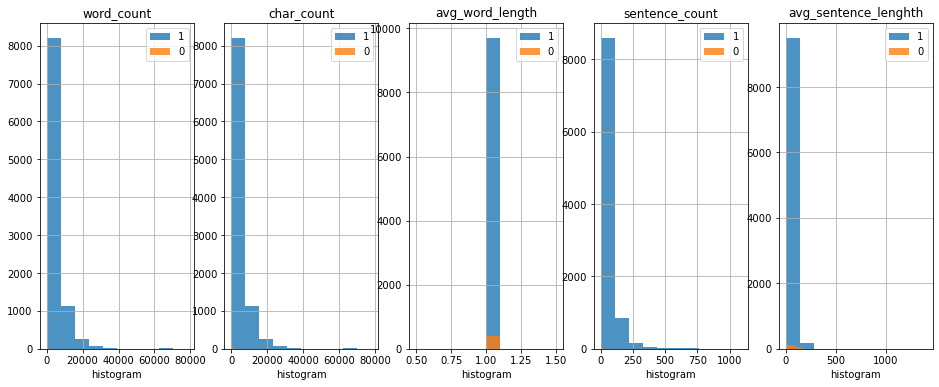

In [139]:
# visualize the distribution of the dataset
import seaborn as sns
x1,x2,x3,x4,x5,y = "word_count","char_count","avg_word_length","sentence_count","avg_sentence_length", "company_paticipants_yes"
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(16,6))
for i in model_df[y].unique():
    sns.distplot(model_df[model_df[y]==i][x1], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(model_df[model_df[y]==i][x2], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[1])
    sns.distplot(model_df[model_df[y]==i][x3], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[2])
    sns.distplot(model_df[model_df[y]==i][x4], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[3])
    sns.distplot(model_df[model_df[y]==i][x5], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[4])
ax[0].grid(True)
ax[0].legend(model_df[y].unique())
ax[0].set_title("word_count")
ax[1].grid(True)
ax[1].legend(model_df[y].unique())
ax[1].set_title("char_count")
ax[2].grid(True)
ax[2].legend(model_df[y].unique())
ax[2].set_title("avg_word_length")
ax[3].grid(True)
ax[3].legend(model_df[y].unique())
ax[3].set_title("sentence_count")
ax[4].grid(True)
ax[4].legend(model_df[y].unique())
ax[4].set_title("avg_sentence_lenghth")
plt.show()

## Topic Modelling

In [140]:
from collections import Counter, OrderedDict
from gensim.models import Phrases
import tomotopy as tp

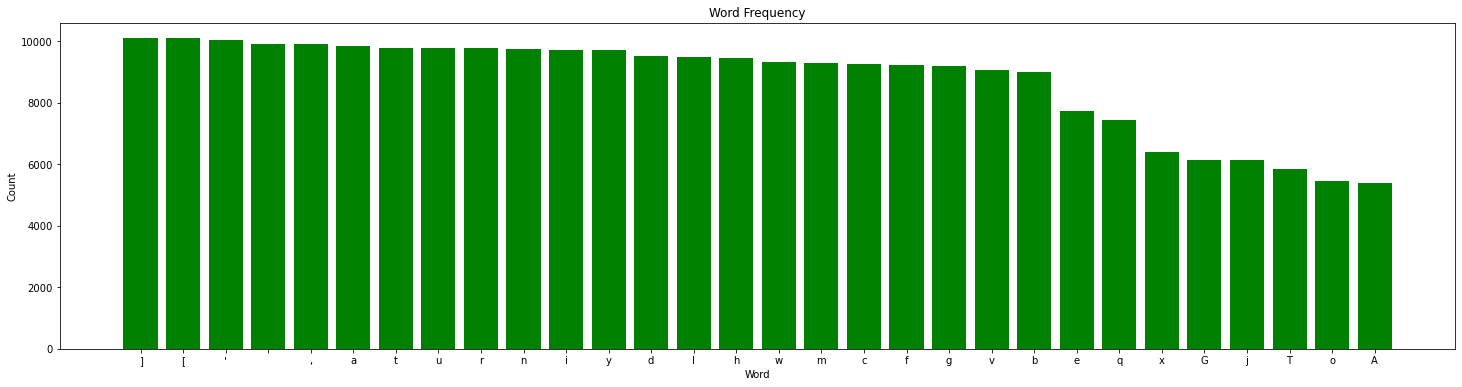

,word,freq
0,],10102
1,[,10102
2,',10043
3,,9900
4,",",9900
...,...,...
76,ê,2
77,ı,1
78,õ,1
79,í,1


In [141]:
temp_token = model_df['token'] # .apply(remove_brackets)
docs_tokens = []
for i in temp_token:
    docs_tokens.append(i)
    
# word frequency
# explore word frequencies
word_freq = Counter(x for xs in docs_tokens for x in set(xs)).most_common()
word_fr = pd.DataFrame(word_freq, columns=['word', 'freq']).sort_values(by='freq', ascending=False)

# visualize word frequencies
# figure size
fig = plt.figure(figsize=(25, 6))
plt.bar(word_fr.word[0:30], word_fr.freq[0:30], color='green')
plt.xlabel("Word")
plt.ylabel("Count")
plt.title("Word Frequency")
plt.show()
word_fr

In [143]:
# remove 20 most frequent words which is known in this context
word_list = word_fr.head(80)['word'].to_list()
mdy_list, tmp=[],[]
for review in docs_tokens:
    for word in review:
        if word not in word_list:
            tmp.append(word)
    mdy_list.append(tmp)
    tmp=[]

model_df['tokens'] = mdy_list

In [144]:
# topic modeling
common_terms = [
u"of",u"with",u"without",u"and",u"or",u"the",
u"a",u"not",u"be",u"to",u"this",u"who",u"in",
]

bigram = Phrases(                              
    docs_tokens,
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    common_terms=common_terms,
)
trigram = Phrases(                             
    bigram[docs_tokens],
    min_count=50,
    threshold=5,
    max_vocab_size=50000,
    common_terms=common_terms,
)
# anks to these two models, 
# we can process the tokenized documents and join the tokens associated with bi- or tri-grams.
docs_phrased = [trigram[bigram[line]] for line in docs_tokens]
# docs_phrased

In [145]:
len(docs_phrased)

10102

10102


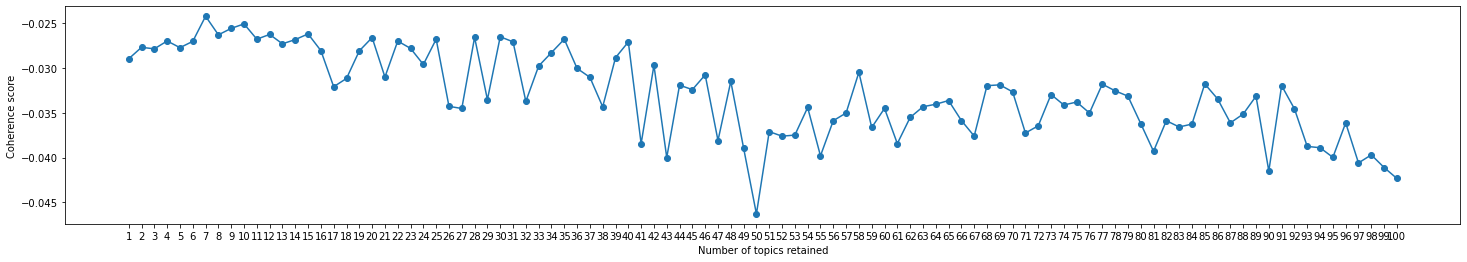

In [146]:
##### important!!! dont run this code ######

# With Tomotopy, it is necessary to wrap the preprocessed documents in a corpus-like object
# create corpus
corpus = tp.utils.Corpus()                   
for item in docs_phrased:                   
    if item != []:
        corpus.add_doc(words=item)
    else:
        corpus.add_doc(words=" ")
print(len(corpus))

# Explore the fit of surrogate models, i.e. models that retain different numbers of topics.
cvs = {}                                    # step 1 We create an empty dictionary to store the scores of different models.
for topic_number in range(1, 101, 1):        # step 2 We let the number of retained topics vary between models, and for each model we record the associated Coherence Score
    mdl = tp.LDAModel(k=topic_number, corpus=corpus) # our over all words
    for i in range(0, 100, 10): # 100 iterations
        mdl.train(10)
        # print("Iteration: {}\tLog-likelihood: {}".format(i, mdl.ll_per_word))
    coh = tp.coherence.Coherence(mdl, coherence="u_mass")
    cvs[topic_number] = coh.get_score() # lower is better

# plot the Coherence Score
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(111)
ax.plot(cvs.keys(), cvs.values(), "o-")
ax.set_xlabel("Number of topics retained")
ax.set_ylabel("Coherence score")
ax.set_xticks(range(1, 101, 1))
plt.show()

In [147]:
# Hence, we train our best fit model.
# 所以，我們訓練我們的最佳模型。
best_mdl = tp.LDAModel(k=90, corpus=corpus)
for i in range(0, 100, 10):
    best_mdl.train(10)
    # print("Iteration: {}\tLog-likelihood: {}".format(i, best_mdl.ll_per_word))
# Using the ‘get_topic_words’ attribute, 
# we retrieve the topic-to-word probabilities, 
# a key outcome of topic modeling. The estimated probabilities are arranged into a Pandas DF.
# 使用“get_topic_words”屬性，我們可以取得主題到詞彙概率的預測，這是主題建模的一個重要結果。
wt = pd.DataFrame()
for k in range(best_mdl.k):
    words, probs = [], []
    for word, prob in best_mdl.get_topic_words(k):
        words.append(word)
        probs.append(prob)
    tmp = pd.DataFrame(
        {
            "word": words,
            "prob": np.round(probs, 3),
            "k": np.repeat(k, len(words)),
            "sort": np.arange(0, len(words)),
        }
    )
    wt = pd.concat([wt, tmp], ignore_index=False)
    del tmp
wt #.head(1).T

,word,prob,k,sort
0,',0.187,0,0
1,i,0.102,0,1
2,,0.101,0,2
3,",",0.097,0,3
4,r,0.085,0,4
...,...,...,...,...
5,y,0.035,89,5
6,n,0.029,89,6
7,u,0.029,89,7
8,h,0.025,89,8


In [148]:
td = pd.DataFrame(
    np.stack([doc.get_topic_dist() for doc in best_mdl.docs]),
    columns=["topic_{}".format(i + 1) for i in range(best_mdl.k)],
)
td #.head(1).T

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,topic_20,topic_21,topic_22,topic_23,topic_24,topic_25,topic_26,topic_27,topic_28,topic_29,topic_30,topic_31,topic_32,topic_33,topic_34,topic_35,topic_36,topic_37,topic_38,topic_39,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49,topic_50,topic_51,topic_52,topic_53,topic_54,topic_55,topic_56,topic_57,topic_58,topic_59,topic_60,topic_61,topic_62,topic_63,topic_64,topic_65,topic_66,topic_67,topic_68,topic_69,topic_70,topic_71,topic_72,topic_73,topic_74,topic_75,topic_76,topic_77,topic_78,topic_79,topic_80,topic_81,topic_82,topic_83,topic_84,topic_85,topic_86,topic_87,topic_88,topic_89,topic_90
0,0.001250,0.007470,0.098507,0.019916,0.000187,0.009653,0.005143,0.004542,0.015341,0.019311,0.001326,0.013017,0.023534,0.048115,0.032964,0.017300,0.000496,0.015637,0.000726,0.004543,0.004467,0.001098,0.000493,0.003196,0.000573,0.004170,0.028248,0.000045,0.000645,0.008068,0.000194,0.019317,0.010394,0.001397,0.002820,0.024490,0.025765,0.002603,0.007771,0.006115,0.008518,0.037990,0.019093,0.000045,0.014971,0.001168,0.000009,0.002901,0.020970,0.002300,0.025546,0.000034,0.018121,0.020589,0.001319,0.003347,0.007253,0.000418,0.042715,0.004241,0.000711,0.004758,0.000121,0.009638,0.002451,0.018420,0.017060,0.047138,0.016244,0.000269,0.000196,0.000266,0.004244,0.001169,0.000048,0.006193,0.001847,0.011970,0.005965,0.052910,0.005596,0.005819,0.002311,0.004773,0.016617,0.000271,0.000793,0.000117,0.015268,0.024418
1,0.110249,0.002549,0.023007,0.007462,0.001753,0.025849,0.002523,0.002517,0.015899,0.015155,0.027223,0.001831,0.018898,0.004695,0.056721,0.013870,0.041954,0.010929,0.022299,0.001117,0.001809,0.006790,0.078516,0.003957,0.008893,0.036321,0.001204,0.023645,0.000421,0.003936,0.042638,0.003247,0.038428,0.000441,0.043351,0.010977,0.000429,0.020909,0.013115,0.002501,0.015200,0.017334,0.006772,0.018719,0.005390,0.006739,0.000086,0.007521,0.001868,0.001180,0.001185,0.001023,0.004690,0.003224,0.000418,0.001854,0.001918,0.001807,0.003268,0.003209,0.015113,0.001023,0.010990,0.000372,0.001184,0.000454,0.001065,0.001855,0.016630,0.001119,0.003246,0.001794,0.003942,0.000416,0.002561,0.002528,0.003961,0.003967,0.000390,0.023650,0.000443,0.000427,0.004093,0.001870,0.000428,0.017324,0.002512,0.004613,0.020141,0.000453
2,0.007464,0.018015,0.007718,0.006707,0.016552,0.008135,0.028695,0.017503,0.006594,0.005953,0.018709,0.006682,0.009499,0.007456,0.006719,0.018988,0.017987,0.017001,0.007639,0.006528,0.006338,0.007207,0.006401,0.006914,0.018177,0.017929,0.007894,0.006678,0.006635,0.006586,0.006573,0.029016,0.017870,0.006950,0.006718,0.006652,0.017878,0.007913,0.007083,0.017246,0.006663,0.007022,0.006930,0.006674,0.007324,0.006408,0.001354,0.007639,0.018377,0.018618,0.007590,0.005040,0.007385,0.006460,0.006593,0.007042,0.019165,0.017411,0.007156,0.006219,0.005298,0.005042,0.029067,0.005863,0.007577,0.007168,0.005693,0.007066,0.007023,0.039863,0.017903,0.017202,0.017791,0.017666,0.029307,0.028789,0.006984,0.018174,0.006152,0.006758,0.006984,0.006734,0.009066,0.018401,0.006748,0.006873,0.006323,0.006160,0.006898,0.007149
3,0.029490,0.002117,0.005765,0.002054,0.005070,0.012693,0.015590,0.008762,0.002020,0.001824,0.002330,0.005447,0.016512,0.002284,0.015660,0.005816,0.008910,0.015409,0.002340,0.001999,0.005342,0.002208,0.012162,0.012319,0.002167,0.002091,0.036423,0.005446,0.002032,0.025821,0.104028,0.012288,0.032678,0.008930,0.002058,0.008839,0.019078,0.005824,0.005570,0.001882,0.002041,0.015753,0.005523,0.022447,0.005644,0.008764,0.000415,0.002340,0.005629,0.005703,0.019327,0.008345,0.002262,0.046185,0.002020,0.002157,0.026273,0.001932,0.002192,0.012106,0.011824,0.001544,0.032707,0.022199,0.002321,0.005596,0.001744,0.002164,0.036156,0.002008,0.008884,0.012070,0.002049,0.008812,0.008977,0.002017,0.002139,0.002166,0.001884,0.042876,0.012341,0.036068,0.016379,0.005636,0.01